## Data Analysis

### 1. Class Distribution

In [181]:
import pandas as pd
import os
from PIL import Image
import warnings
import matplotlib.pyplot as plt

In [168]:
# dataset = pd.read_csv('./data/train.csv') # Gede's import
dataset = pd.read_csv("./data/recognition/train.csv") # Basil's import
print(dataset.columns)

Index(['id', 'url', 'landmark_id'], dtype='object')


In [169]:
dir = "/run/media/dekatria/My Passport/kaggle_dataset/google_recognition/train/" # Basil's import
imgList = os.listdir(dir) 

print("Number of Images expected (Training): %s" % (dataset.shape[0]))
print("Number of Images downloaded (Training): %s" % len(imgList))
print("Difference: %s" % (dataset.shape[0] - len(imgList)))

print("Missing Images:")
expImgList = ["%s.jpg" % x for x in range(dataset.shape[0])]
    

for i in list(set(expImgList)-set(imgList)):
    ind = int(i[:-4])
    print(dataset.iloc[ind])

dataset = dataset.drop(dataset.index[[int(i[:-4]) for i in list(set(expImgList)-set(imgList))]])
print("Sanity Check: %s" % (dataset.shape[0] == len(imgList)))

Number of Images expected (Training): 1225029
Number of Images downloaded (Training): 1225027
Difference: 2
Missing Images:
id                                              92423ea7db8ff3af
url            http://r2.bru02t11.c.bigcache.googleapis.com/s...
landmark_id                                                10895
Name: 792934, dtype: object
id                                              10f06455b6a05d88
url            http://celebhot.hol.es/picture/static.panorami...
landmark_id                                                12914
Name: 723431, dtype: object
Sanity Check: True


In [170]:
# TAKES A LONG TIME DO NOT RUN, USE PRE-PROCESSED FILE INSTEAD
# warnings.filterwarnings('ignore')
# imgList.sort()

# imgDim = []
# for i in imgList:
# #     print("Processing: %s" i, end="\r")
#     try:
#         img = Image.open(dir + i)
#         imgDim.append(img.size)
#     except:
#         imgDim.append(("NA","NA"))
# print(imgDim[:5])

In [171]:
# with open("./logs/dim_list.csv", "w") as output:
#     output.write("index, width, length, pixelCount\n")
#     for i in range(len(imgList)):
# #         print("Processing: %s" % imgList[i])
#         if "NA" not in imgDim[i]:
#             output.write("%s, %s, %s, %s\n" % (imgList[i][:-4], 
#                                                imgDim[i][0], 
#                                                imgDim[i][1], 
#                                                imgDim[i][0]*imgDim[i][1]))
#         else:
#             output.write("%s, %s, %s, NA\n" % (imgList[i][:-4], 
#                                                imgDim[i][0], 
#                                                imgDim[i][1]))

In [172]:
imgDim = pd.read_csv("./logs/dim_list.csv", 
                     index_col="index", 
                     na_values="NA", 
                     sep=",\s+")

print("Sanity Check: %s" % (dataset.shape[0] == imgDim.shape[0]))

dataset = pd.concat([dataset, imgDim], axis=1)

print("Sanity Check: %s" % (dataset.shape[0] == imgDim.shape[0]))

print(dataset.iloc[0])

/home/dekatria/.conda/envs/201801-compVis/lib/python3.5/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Sanity Check: True
Sanity Check: True
id                                              cacf8152e2d2ae60
url            http://static.panoramio.com/photos/original/70...
landmark_id                                                 4676
width                                                       3951
length                                                      2963
pixelCount                                           1.17068e+07
Name: 0, dtype: object


In [173]:
print("Number of Bad Images: %s" % sum(dataset["pixelCount"].isna()))
dataset = dataset[dataset["pixelCount"].notna()]
print("Current Number of Usable Images: %s" % (dataset.shape[0]))

Number of Bad Images: 692
Current Number of Usable Images: 1224335


/home/dekatria/.conda/envs/201801-compVis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


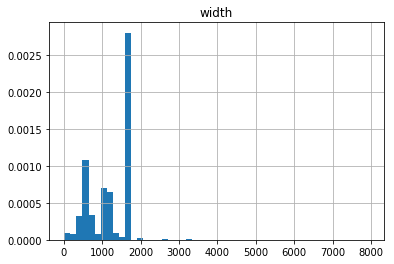

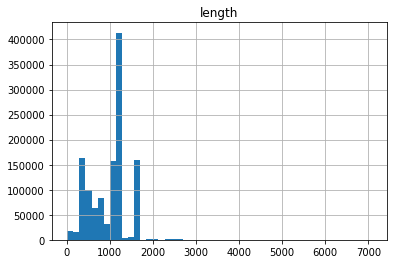

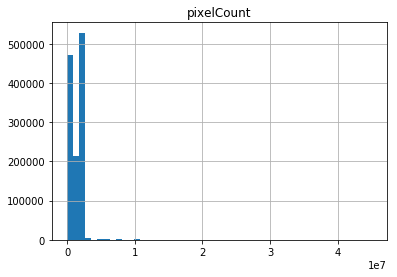

,id,url,landmark_id,width,length,pixelCount
count,1224335,1224335,1.224335e+06,1.224335e+06,1.224335e+06,1.224335e+06
unique,1224335,1224335,NaN,NaN,NaN,NaN
top,ee3fc0b24918daa5,http://lh3.ggpht.com/-AEOt8LP_6GQ/SRWzr5OGXGI/...,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.335404e+03,1.167475e+03,9.834075e+02,1.315849e+06
std,NaN,NaN,4.026565e+03,5.034906e+02,4.299858e+02,9.801908e+05
min,NaN,NaN,0.000000e+00,1.000000e+01,1.400000e+01,1.500000e+02
25%,NaN,NaN,4.083000e+03,6.420000e+02,6.000000e+02,4.215000e+05
50%,NaN,NaN,7.075000e+03,1.200000e+03,1.071000e+03,1.707200e+06
75%,NaN,NaN,1.040000e+04,1.600000e+03,1.200000e+03,1.920000e+06


In [197]:
dataset.hist(column="width", bins=50, normed=True)
dataset.hist(column="length", bins=50)
dataset.hist(column="pixelCount", bins=50)
plt.show()
dataset.describe(include="all")

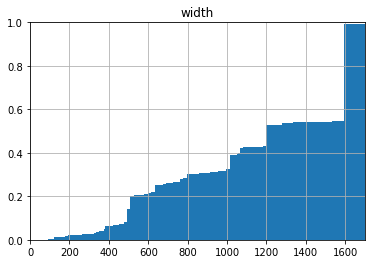

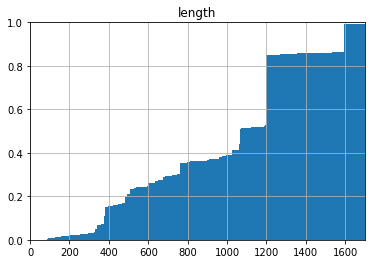

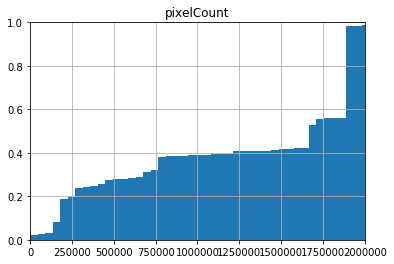

In [214]:
ylim = 1
dataset.hist(cumulative=True, column="width", bins=1000, density=True)
plt.ylim(0,ylim)
plt.xlim(0,2000*0.85)
dataset.hist(cumulative=True, column="length", bins=1000, density=True)
plt.ylim(0,ylim)
plt.xlim(0,2000*0.85)
dataset.hist(cumulative=True, column="pixelCount", bins=1000, density=True)
plt.ylim(0,ylim)
plt.xlim(0,2000*2000*0.5)
plt.show()

In [112]:
data_freq = dataset.groupby('pixelCount').size().reset_index(name='counts')
print('Maximum:', data_freq['counts'].max())
print('Mean:', data_freq['counts'].mean())
print('No. classes:', len(data_freq))

print('\nFiltering classes with count > 80')
data_freq_upper = data_freq[data_freq['counts'] > 80]
print('Mean:', int(data_freq_upper['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper))

print('\nFiltering classes with count > 40')
data_freq_upper2 = data_freq[data_freq['counts'] > 40]
print('Mean:', int(data_freq_upper2['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper2))

print('\nFiltering classes with count > 20')
data_freq_upper3 = data_freq[data_freq['counts'] > 20]
print('Mean:', int(data_freq_upper3['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper3))

                      id                                                url  \
count            1225027                                            1225027   
unique           1225027                                            1225027   
top     ee3fc0b24918daa5  http://lh3.ggpht.com/-AEOt8LP_6GQ/SRWzr5OGXGI/...   
freq                   1                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

         landmark_id    width   length  pixelCount 

Getting instance count of each class

In [3]:
data_freq = dataset.groupby('landmark_id').size().reset_index(name='counts')
print('Maximum:', data_freq['counts'].max())
print('Mean:', data_freq['counts'].mean())
print('No. classes:', len(data_freq))

print('\nFiltering classes with count > 80')
data_freq_upper = data_freq[data_freq['counts'] > 80]
print('Mean:', int(data_freq_upper['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper))

print('\nFiltering classes with count > 40')
data_freq_upper2 = data_freq[data_freq['counts'] > 40]
print('Mean:', int(data_freq_upper2['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper2))

print('\nFiltering classes with count > 20')
data_freq_upper3 = data_freq[data_freq['counts'] > 20]
print('Mean:', int(data_freq_upper3['counts'].mean()), 'images per class')
print('No. valid classes:', len(data_freq_upper3))

# print(data_freq)

Maximum: 50337
Mean: 81.93625844425122
No. classes: 14951

Filtering classes with count > 80
Mean: 413 images per class
No. valid classes: 2421

Filtering classes with count > 40
Mean: 270 images per class
No. valid classes: 4040

Filtering classes with count > 20
Mean: 187 images per class
No. valid classes: 6154


In [4]:
# saving stuff
data80_filter = data_freq_upper['landmark_id']
dataset80 = dataset[dataset['landmark_id'].isin(data80_filter)]
dataset80.to_csv("./data/train80.csv")


data40_filter = data_freq_upper2['landmark_id']
dataset40 = dataset[dataset['landmark_id'].isin(data40_filter)]
dataset40.to_csv("./data/train40.csv")

data20_filter = data_freq_upper['landmark_id']
dataset20 = dataset[dataset['landmark_id'].isin(data20_filter)]
dataset20.to_csv("./data/train20.csv")